In [35]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


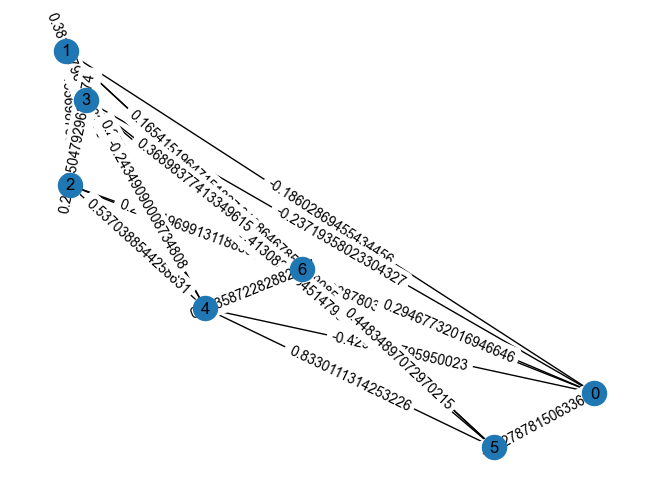

In [36]:
T = 15

# Load data from a JSONL file
market = Market.from_jsonl("./tick_data.jsonl")

# Get periods of length 15
periods = market.get_periods(period_length=3)

# Build the graph
state_graph = market.build_graph(periods, threshold=0.1)

clustering = LouvainClustering().fit(periods, G=state_graph)

In [37]:
# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
print(f"Cluster labels: {clustering.labels}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 7
Number of clusters: 3
Cluster sizes: [2, 3, 2]
Cluster labels: [0 1 1 1 2 2 0]
Transition matrix: 
[[0.5        0.5        0.        ]
 [0.         0.66666667 0.33333333]
 [0.5        0.         0.5       ]]


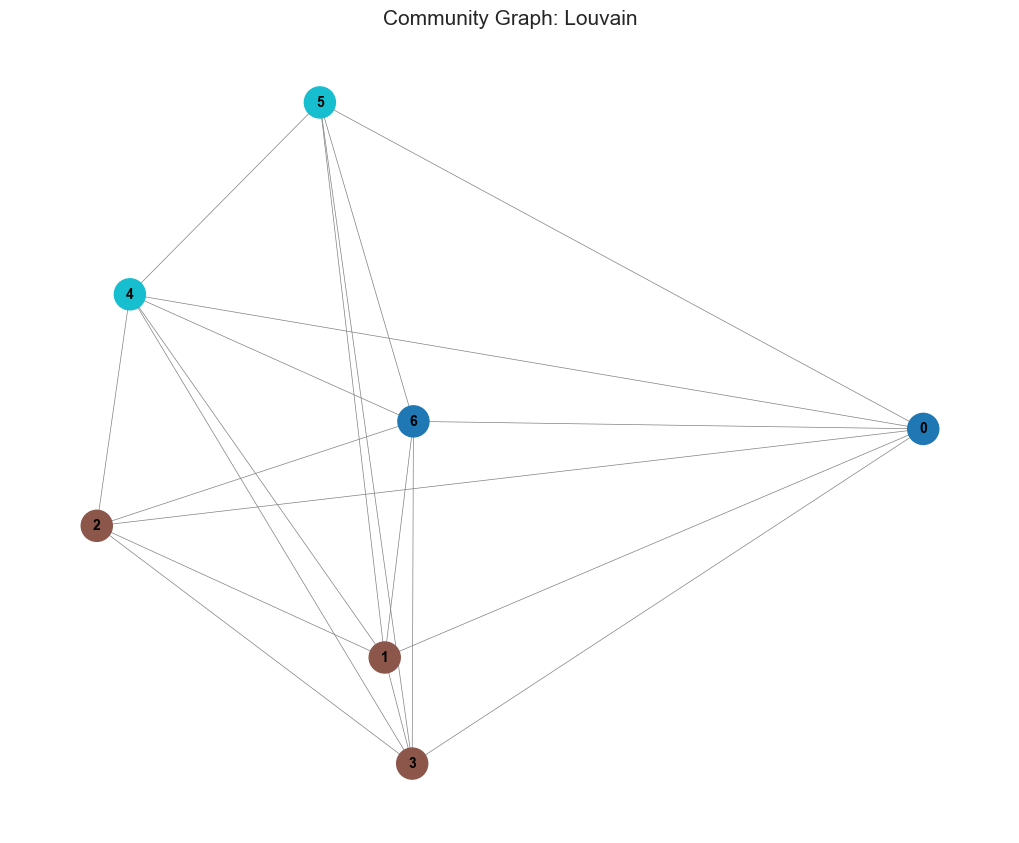

In [40]:
clustering.plot_community_graph(state_graph, method='Louvain')